# 実習5.1：2次元配列の要素の参照

In [1]:
import numpy as np

a=np.array([[3,5],
            [4,9]])

print('行インデックス0:', a[0])
print('行インデックス1:', a[1])

print('行インデックス0 列インデックス0の値:', a[0,0])
print('行インデックス0 列インデックス1の値:', a[0,1])
print('行インデックス1 列インデックス0の値:', a[1,0])
print('行インデックス1 列インデックス1の値:', a[1,1])

行インデックス0: [3 5]
行インデックス1: [4 9]
行インデックス0 列インデックス0の値: 3
行インデックス0 列インデックス1の値: 5
行インデックス1 列インデックス0の値: 4
行インデックス1 列インデックス1の値: 9


# 実習5.2：2次元配列に対する平均の計算

In [5]:
import numpy as np

# 0から9までの値を持つ1次元配列を生成
a=np.arange(10)
print(a)

# 1次元配列を5行2列の2次元配列へ変形
a=a.reshape(5,2)
print(a)

# aの全要素を使って平均を計算
m=np.mean(a)
print(m)

[0 1 2 3 4 5 6 7 8 9]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
4.5


# 実習5.3：2次元配列に対する軸を指定した平均

In [6]:
import numpy as np

# 0から9までの値を持つ1次元配列を生成
a=np.arange(10)
print(a)

# 1次元配列を5行2列の2次元配列へ変形
a=a.reshape(5,2)
print(a)

# axis=0: 行方向に平均を計算
# 列ごとに平均が求まる
m=np.mean(a,axis=0)
print(m)

# aの各列に対して、平均を引く
b=a-m
print(b)

[0 1 2 3 4 5 6 7 8 9]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[4. 5.]
[[-4. -4.]
 [-2. -2.]
 [ 0.  0.]
 [ 2.  2.]
 [ 4.  4.]]


# グラフで2バイト文字を使うためのライブラリのインストール

In [7]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=3f54d4a9c775627767fb7fa241b66cba5b109604631850f869f55d2861b3853d
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


# 関数：図の保存用

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

def save_fig(plt, file_prefix):
    if file_prefix == '':
        return
    
    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches='tight', pad_inches = 0)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches = 0)

# 関数：教師データの可視化

In [9]:
import matplotlib.pyplot as plt
import japanize_matplotlib

%matplotlib inline

XY_MIN = None # プロットする範囲の最小値
XY_MAX = None # プロットする範囲の最大値

def show_data2(x, t, title='', show=True, file_prefix=''):
    """    
    2次元2クラスデータを表示する。
    
    Parameters
    ----------
    x : ndarray
        体重・身長データ。2次元配列。shape = (N, 2)。
        X[:, 0] -> 検査項目A、X[:, 1] -> 検査項目B
    t : ndarray
        性別データ。1次元配列。shape = (N)。0 -> Negative1 -> Positive
    """
    
    global XY_MIN
    global XY_MAX
    
    classes = list(set(t))
    classes.sort()
    labels = ['陰性', '陽性']
    
    plt.figure(figsize=(7, 7))
    
    for l, c in zip(labels, classes):
        points = x[t == c]
        plt.plot(points[:, 0], points[:, 1], 
                 linestyle='none', markeredgecolor='black',
                 marker='o', alpha=0.6, markersize=10, label=f'{l} ({c})')

    if XY_MIN == -1:
        xmax = np.max(x[:, 0])
        xmin = np.min(x[:, 0])
        ymax = np.max(x[:, 1])
        ymin = np.min(x[:, 1])
        XY_MAX = int(max(xmax, ymax) + 0.5)
        XY_MIN = int(min(xmin, ymin) - 0.5)
    
    if title != '':
        plt.title(title, fontsize=18)
    plt.xlim(XY_MIN, XY_MAX)
    plt.ylim(XY_MIN, XY_MAX)
    plt.xlabel('検査項目A', fontsize=16)
    plt.ylabel('検査項目B', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=12, loc='lower right')
    
    save_fig(plt, file_prefix=file_prefix)
    if show:
        plt.show()

# 実習5.4：データの読み込み

In [10]:
import pandas as pd

df=pd.read_csv('data5.csv')

df

,a,b,y
0,12.539509,2.091269,0
1,5.549033,6.218170,1
2,8.133034,5.604944,0
3,5.549129,6.688726,0
4,6.393181,3.620900,0
...,...,...,...
195,4.763672,6.639644,1
196,4.739603,5.925565,0
197,7.988969,3.860030,1
198,8.309895,5.756325,0


# 実習5.5：教師データの準備

データ数: 200
配列aの形状: (200,)
配列bの形状: (200,)
配列yの形状: (200,)
xの形状: (2, 200)
xの形状: (200, 2)


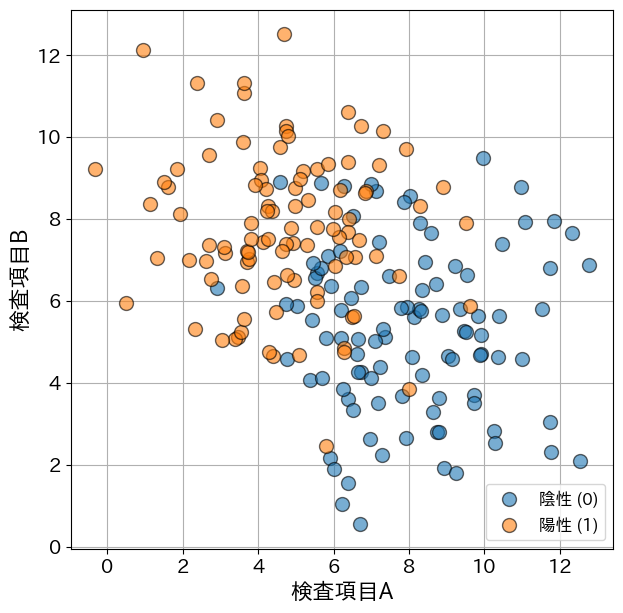

In [11]:
import numpy as np

a=df['a'].to_numpy()
b=df['b'].to_numpy()
y=df['y'].to_numpy()

print('データ数:', len(a))
print('配列aの形状:', a.shape)
print('配列bの形状:', b.shape)
print('配列yの形状:', y.shape)

# 配列aとbから2次元配列xを生成する
x=np.stack([a,b])
print('xの形状:', x.shape)

# 2行200列のデータを200行2列のデータにするため、xの転置をとる
x=x.T
print('xの形状:', x.shape)

# データ分布を可視化する
show_data2(x,y)

# 実習5.6：訓練データとテストデータに分割

訓練データxの形状: (140, 2)
訓練データyの形状: (140,)
テストデータxの形状: (60, 2)
テストデータyの形状: (60,)


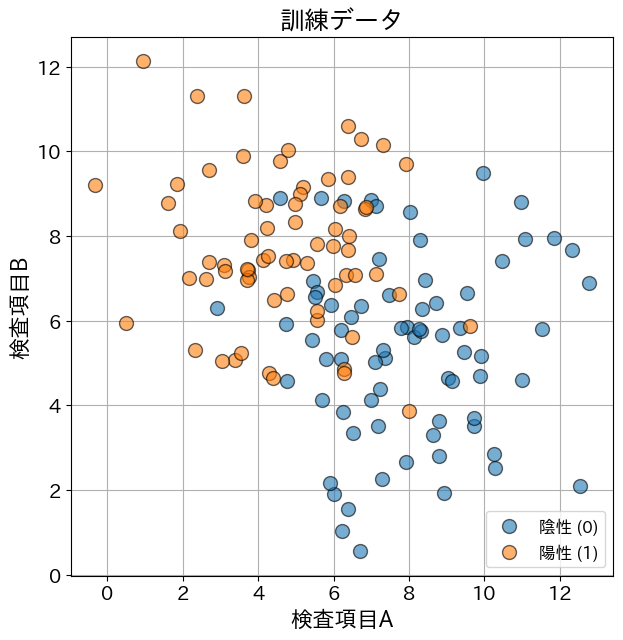

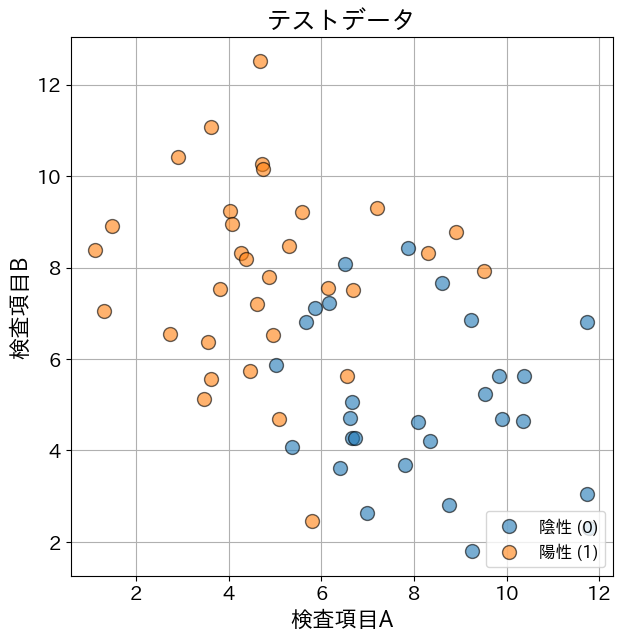

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,  # 入力データ
                                               y,  # 正解ラベル
                                               test_size=0.3, # 全データに対するテストデータの割合
                                               random_state=0) # 乱数シードを指定

print('訓練データxの形状:', x_train.shape)
print('訓練データyの形状:', y_train.shape)
print('テストデータxの形状:', x_test.shape)
print('テストデータyの形状:', y_test.shape)

show_data2(x_train,y_train,title='訓練データ')

show_data2(x_test,y_test,title='テストデータ')

# 実習5.7：データの前処理

In [14]:
m=np.mean(x_train,axis=0) # 行方向に平均を計算
s=np.std(x_train,axis=0)  # 行方向に標準偏差を計算

print('訓練データの平均:', m)
print('訓練データの標準偏差:', s)

# 訓練データの平均と標準偏差で訓練データを標準化
z_train=(x_train-m)/s

# 訓練データの平均と標準偏差でテストデータを標準化
z_test=(x_test-m)/s

訓練データの平均: [6.36324664 6.51752753]
訓練データの標準偏差: [2.57722887 2.28220667]


# 実習5.8：ネットワークモデルの定義

In [19]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential() # ネットワークの容れ物を作る

neuron=Dense(input_dim=2,          # 1個の入力データの成分数。検査項目AとBの2成分
             units=1,              # ニューロン数
             activation='sigmoid') # 活性化関数にシグモイド(sigmoid)を指定

# 作成したニューロンをネットワークの容れ物に追加
model.add(neuron)

# ネットワークの要約を表示
model.summary()

# 損失関数と最適化手法の設定
# lose: 損失関数を指定する引数。
# binary_crossentropyは2クラス分類用の交差エントロピー誤差。
# optimizer: パラメータの最適化手法を指定。
# SDGは確率的勾配降下法(Stochastic Gradient Descent)の略。
model.compile(loss='binary_crossentropy',
              optimizer='SGD')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# 実習5.9：訓練データによる学習

In [20]:
history=model.fit(z_train, # ネットワークへの入力データ(標準化なしの体温)
                  y_train, # 正解クラスラベル
                  batch_size=len(z_train), # バッチサイズ
                  epochs=1000) # エポック数

Epoch 1/1000
1/1 [==============================] - 0s 284ms/step - loss: 0.6248
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6240
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6231
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6222
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6213
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6204
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6196
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6187
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6179
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6170
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6162
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6153
Epoch 13/1000
1/1 [==========================

# 実習5.10：訓練データに対する予測性能の評価

In [23]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(z_train)

c_pred=(y_pred>=0.5)*1

# 正解ラベルy_trainと予測ラベルc_predを
# 関数confusion_matrixに渡して、混同行列を計算する。
# cm[0, 0] = TN, cm[0, 1] = FN, cm[1, 0] = FP, cm[1, 1] = TP
cm=confusion_matrix(y_train,c_pred)
print('混同行列')
print(cm)

train_a=(cm[0,0]+cm[1,1])/np.sum(cm)
print('正解率:', train_a)

# 精度を計算
train_p=cm[1,1]/(cm[0,1]+cm[1,1])
print('精度:', train_p)

# 再現率を計算
train_r=cm[1,1]/(cm[1,0]+cm[1,1])
print('再現率:', train_r)

5/5 [==============================] - 0s 2ms/step
混同行列
[[58 14]
 [10 58]]
正解率: 0.8285714285714286
精度: 0.8055555555555556
再現率: 0.8529411764705882


# 実習5.11：テストデータを使い汎化能力を推定

In [24]:
y_pred=model.predict(z_test)
c_pred=(y_pred>=0.5)*1

cm=confusion_matrix(y_test,c_pred)

print('混同行列')
print(cm)

test_a=(cm[0,0]+cm[1,1])/np.sum(cm)
print('正解率:', test_a)

# 精度を計算
test_p=cm[1,1]/(cm[0,1]+cm[1,1])
print('精度:', test_p)

# 再現率を計算
test_r=cm[1,1]/(cm[1,0]+cm[1,1])
print('再現率:', test_r)

2/2 [==============================] - 0s 3ms/step
混同行列
[[22  6]
 [ 4 28]]
正解率: 0.8333333333333334
精度: 0.8235294117647058
再現率: 0.875
